<IPython.core.display.Javascript object>


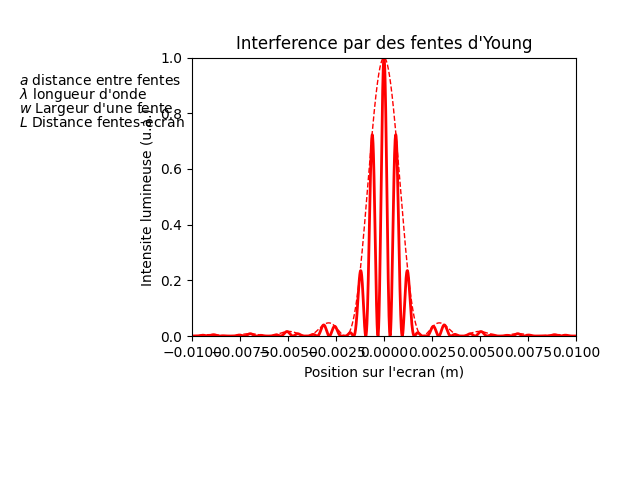

<IPython.core.display.Javascript object>


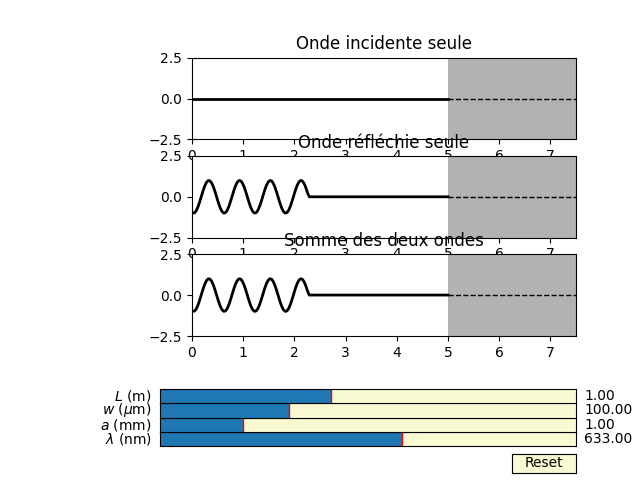

In [20]:
#-----------------------------------------------------------------------
# Animation d'une onde stationnaire dûe à une réflexion totale
#
# L'onde arrive de la gauche et se réfléchit intégralement
#
# Le première graphe montre seulement l'onde incidente,
# le second seulement l'onde réfléchie et le troisième leur somme
#
# Il est possible de choisir une extrémité droite fixe ou libre
#-----------------------------------------------------------------------
# Renseignements/bugs : Guillaume Dewaele <agreg(at)sci-phy.org>
#-----------------------------------------------------------------------

# Paramètres modifiables

# Nombre de périodes actives
Na = 30

# Nombre de périodes inactives
Ni = 20

# Longueur d'onde 
lamb = 0.6

# Célérité de l'onde 
c = 1.0

# Extrémité fixe (True) ou libre (False)
fixe = True

# Afficher ou non la zone à droite de l'extrémité
droite = True

#-----------------------------------------------------------------------

# Bibliothèques utilisées

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from itertools import count

#-----------------------------------------------------------------------

def Onde(x, t) :
    x = (-x + c*t)/lamb
    
    x = x % (Na+Ni)
    
    if x<Na :
        return np.sin(2*np.pi*x)
    else :
        return 0.0
    

# coefficient pour la réflexion

coeff = -1.0 if fixe else 1.0
    
# Détection utilisation hors Pyzo

if '__iep__' not in globals() :
    matplotlib.interactive(False)

# Zones pour les ondes

X1 = np.linspace(-5.0, 5.0, 300)
X2 = np.linspace(5.0, 7.5, 150)

# Onde incidente

plt.subplot(3, 1, 1)
plt.title("Onde incidente seule")
crv11, = plt.plot(X1, np.vectorize(lambda x : Onde(x, 0.0))(X1), 'k', linewidth=2)
crv12, = plt.plot(X2, np.vectorize(lambda x : Onde(x, 0.0))(X2), 'k--', linewidth=1)

if droite :
    plt.axvspan(5.0, 8.0, facecolor='k', alpha=0.3)
plt.xlim(0.0, 7.5 if droite else 5.0)
plt.ylim(-2.5, 2.5)

# Onde réfléchie

plt.subplot(3, 1, 2)
plt.title("Onde réfléchie seule")
crv21, = plt.plot(X1, np.vectorize(lambda x : coeff*Onde(10.0-x, 0.0))(X1), 'k', linewidth=2)
crv22, = plt.plot(X2, np.vectorize(lambda x : coeff*Onde(10.0-x, 0.0))(X2), 'k--', linewidth=1)

if droite :
    plt.axvspan(5.0, 8.0, facecolor='k', alpha=0.3)
plt.xlim(0.0, 7.5 if droite else 5.0)
plt.ylim(-2.5, 2.5)

# Somme des deux ondes

plt.subplot(3, 1, 3)
plt.title("Somme des deux ondes")
crv31, = plt.plot(X1, np.vectorize(lambda x : Onde(x, 0.0)+coeff*Onde(10.0-x, 0.0))(X1), 'k', linewidth=2)
crv32, = plt.plot(X2, np.vectorize(lambda x : Onde(x, 0.0)+coeff*Onde(10.0-x, 0.0))(X2), 'k--', linewidth=1)

if droite :
    plt.axvspan(5.0, 8.0, facecolor='k', alpha=0.3)
plt.xlim(0.0, 7.5 if droite else 5.0)
plt.ylim(-2.5, 2.5)

# Animation

def SizeChanged(ax, old=[]) :
    current = [ ax.bbox.width, ax.bbox.height ]
    if old != current :
        old[:] = current
        return True
    return False

def Update(t) :
    crv11.set_data(X1, np.vectorize(lambda x : Onde(x, t))(X1))
    crv12.set_data(X2, np.vectorize(lambda x : Onde(x, t))(X2))
    crv21.set_data(X1, np.vectorize(lambda x : coeff*Onde(10.0-x, t))(X1))
    crv22.set_data(X2, np.vectorize(lambda x : coeff*Onde(10.0-x, t))(X2))
    crv31.set_data(X1, np.vectorize(lambda x : Onde(x, t)+coeff*Onde(10.0-x, t))(X1))
    crv32.set_data(X2, np.vectorize(lambda x : Onde(x, t)+coeff*Onde(10.0-x, t))(X2))
    if SizeChanged(plt.gca()) :
        plt.gcf().canvas.draw()
    return [crv11, crv12, crv21, crv22, crv31, crv32]

def Init() :
    crv11.set_data(X1, np.ma.array(X1, mask=True))
    crv12.set_data(X2, np.ma.array(X2, mask=True))
    crv21.set_data(X1, np.ma.array(X1, mask=True))
    crv22.set_data(X2, np.ma.array(X2, mask=True))
    crv31.set_data(X1, np.ma.array(X1, mask=True))
    crv32.set_data(X2, np.ma.array(X2, mask=True))
    return [crv11, crv12, crv21, crv22, crv31, crv32]

anim = ani.FuncAnimation(plt.gcf(), Update, count(0.0, c/50.0), interval=20, blit=True, init_func=Init)

# Détection utilisation hors Pyzo

if '__iep__' not in globals() :
    plt.show()
    